In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# ---------- 1. Dataset Setup ----------
DATADIR = r"C:\Users\swarn\OneDrive\Desktop\DataSets"
CATEGORIES = ["AI_images", "Realimages"]
IMG_SIZE = 128

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception:
                pass

create_training_data()
random.shuffle(training_data)

# ---------- 2. Separate Features & Labels ----------
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255.0  # Normalize pixel values
y = np.array(y)

# ---------- 3. Split Dataset ----------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- 4. Data Augmentation ----------
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# ---------- 5. Model Architecture ----------
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])

# ---------- 6. Compile Model ----------
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------- 7. Train Model with EarlyStopping ----------
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[early_stop]
)

# ---------- 8. Evaluate Model ----------
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,617 (92.25 KB)

 Trainable params: 23,617 (92.25 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\swarn\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.5059 - loss: 0.6971 - val_accuracy: 0.5704 - val_loss: 0.6868
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - accuracy: 0.5951 - loss: 0.6704 - val_accuracy: 0.5854 - val_loss: 0.6727
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.6029 - loss: 0.6602 - val_accuracy: 0.6106 - val_loss: 0.6554
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step - accuracy: 0.6841 - loss: 0.6211 - val_accuracy: 0.6482 - val_loss: 0.6440
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.6698 - loss: 0.6211 - val_accuracy: 0.6558 - val_loss: 0.6422
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.6567 - loss: 0.6311 - val_accuracy: 0.6307 - val_loss: 0.6471
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.6877 - loss: 0.6039 - val_accuracy: 0.6281 - val_loss: 0.6524
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.6770 - loss: 0.6206 - val_accu

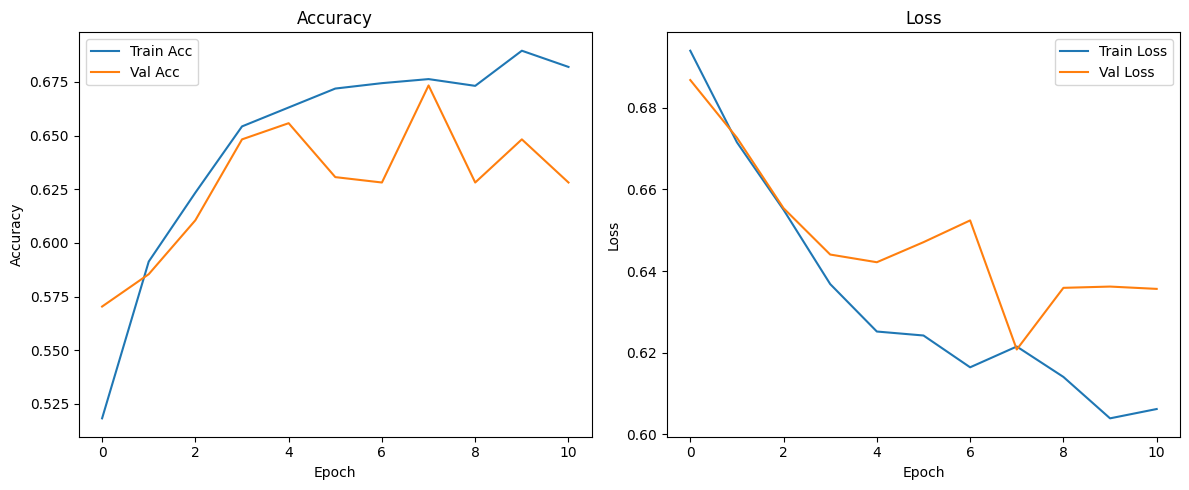

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=CATEGORIES))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
[[111  78]
 [ 52 157]]
              precision    recall  f1-score   support

   AI_images       0.68      0.59      0.63       189
  Realimages       0.67      0.75      0.71       209

    accuracy                           0.67       398
   macro avg       0.67      0.67      0.67       398
weighted avg       0.67      0.67      0.67       398



In [20]:
model.save("my_model.keras")  # This is the recommended format for Keras 3+



In [22]:
from tensorflow.keras.models import load_model

model = load_model("my_model.keras")


In [24]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model("my_model.keras")

IMG_SIZE = 128
CATEGORIES = ["AI Image", "Real Image"]

def predict_image(img):
    # Convert to NumPy array if it's PIL
    img = np.array(img)

    # Resize and normalize
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

    # Predict
    prediction = model.predict(img)[0][0]
    label = CATEGORIES[1] if prediction > 0.5 else CATEGORIES[0]
    confidence = prediction if prediction > 0.5 else 1 - prediction

    return f"{label} ({confidence*100:.2f}%)"

# Gradio interface without webcam
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload or Paste an Image"),
    outputs=gr.Textbox(label="Prediction"),
    title="AI vs Real Image Classifier",
    allow_flagging="never"  # Optional: removes the "Flag" button
)

interface.launch()


C:\Users\swarn\AppData\Roaming\Python\Python312\site-packages\gradio\interface.py:419: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
